# Coding Block 3 - Decision Trees

### Load the packages

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset (the complete data with outliers and missing data). 

In [7]:
df = pd.read_csv("../data/df_imputed_clean.csv")

### Build a decision tree model
Think of training-test distinction -- with cross validation.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max-Scaler initialisieren
scaler = MinMaxScaler()

# Normalisierung der Feature-Daten (X)
X_scaled = scaler.fit_transform(X)

# Erneutes Aufteilen der normalisierten Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Entscheidungsbaum-Modell initialisieren
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Cross-Validation (5-fold) mit normalisierten Daten
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy")

# Durchschnittliche Genauigkeit aus Cross-Validation
cv_mean_accuracy = cv_scores.mean()

# Modell auf normalisierten Trainingsdaten trainieren
dt_model.fit(X_train, y_train)

# Vorhersagen auf normalisierten Testdaten
y_pred = dt_model.predict(X_test)

# Genauigkeit auf Testdaten
test_accuracy = accuracy_score(y_test, y_pred)

cv_mean_accuracy, test_accuracy


(np.float64(0.7444444444444445), 0.7397260273972602)

### Evaluate the prediction model using a classification report
Does the model look like a successful model?

In [17]:
from sklearn.metrics import classification_report

# Klassifikationsbericht erstellen
classification_rep = classification_report(y_test, y_pred)

# Bericht ausgeben
print(classification_rep)


              precision    recall  f1-score   support

         0.0       0.74      0.93      0.83        97
         1.0       0.72      0.37      0.49        49

    accuracy                           0.74       146
   macro avg       0.73      0.65      0.66       146
weighted avg       0.74      0.74      0.71       146



## Visualize the Decision Tree

One way to  do this is using <b>

    <i>from sklearn.tree import plot_tree</i>

Alternative way of plotting the decision tree using

    <i> from sklearn.tree import export_graphviz import pydotplus </i>

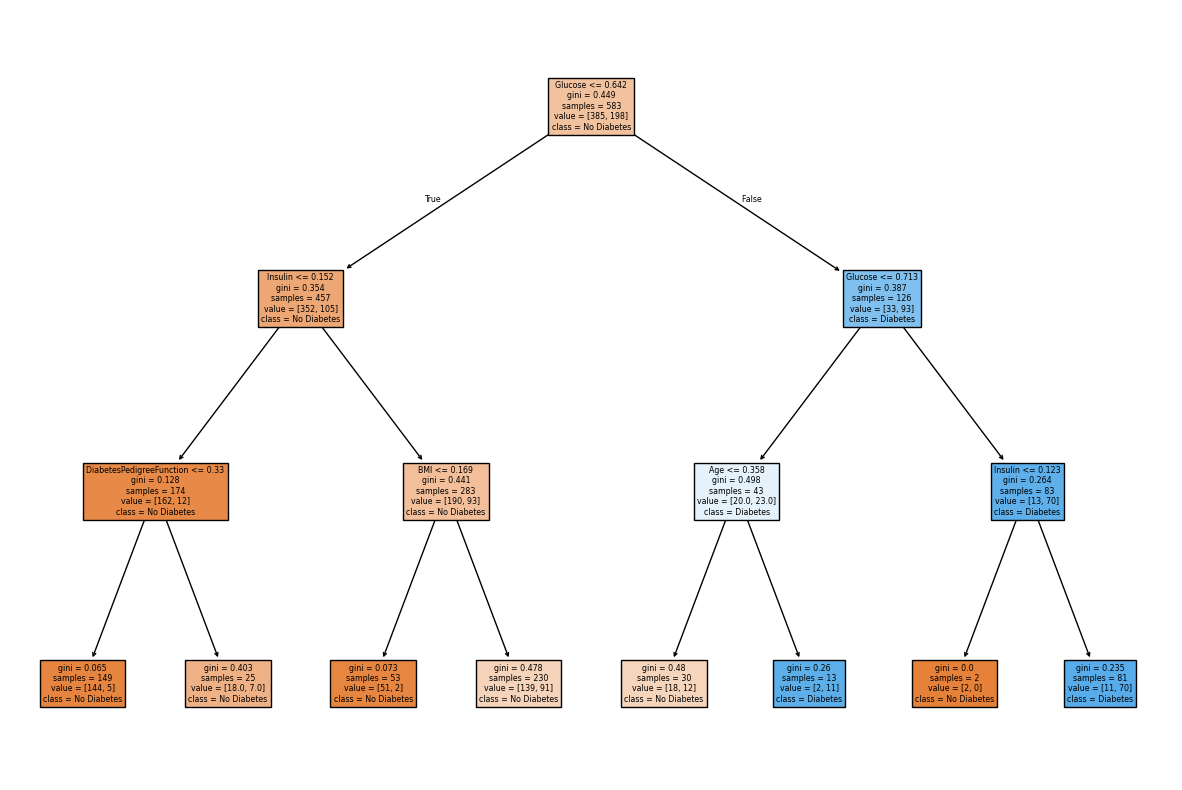

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.show()


### Make Decision Rules

Make the decision rules explicit. You can use (e.g.)
    <i> from sklearn.tree import export_text </i>

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import cross_val_score

# Stratification: Datensatz in Training (75%) und Test (25%) aufteilen
X = df.drop(columns=['Outcome'])  # Features (alle außer Zielvariable)
y = df['Outcome']  # Zielvariable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Min-Max-Normalisierung
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection (Wähle die besten Merkmale)
selector = SelectKBest(score_func=f_classif, k='all')  # Behalte alle Features, keine Einschränkung
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# RandomForest zur besseren Feature-Analyse
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_
selected_features = np.argsort(feature_importance)[-10:]  # Wähle die 10 wichtigsten Features aus
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

# Logistische Regression mit optimierten Hyperparametern
model = LogisticRegression(max_iter=5000, solver='saga', C=1.0, penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Trainingsdaten:", X_train.shape, "Testdaten:", X_test.shape)
print("Genauigkeit des Modells:", accuracy)
print("Klassifikationsbericht:\n", report)

# Berechnung der Odds Ratios
odds_ratios = np.exp(model.coef_)[0]  # Exponentiierung der Koeffizienten
feature_importance_df = pd.DataFrame({
    'Feature': [X.columns[i] for i in selected_features],
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

print("Feature Importance (Odds Ratios):\n", feature_importance_df)

# Entscheidungsbaum-Modell initialisieren
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Cross-Validation (5-fold) mit normalisierten Daten
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy")

# Durchschnittliche Genauigkeit aus Cross-Validation
cv_mean_accuracy = cv_scores.mean()

# Modell auf normalisierten Trainingsdaten trainieren
dt_model.fit(X_train, y_train)

# Vorhersagen auf normalisierten Testdaten
y_pred_dt = dt_model.predict(X_test)

# Genauigkeit auf Testdaten
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Cross-Validation Accuracy (Decision Tree):", cv_mean_accuracy)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)

# Entscheidungsregeln explizit machen
decision_rules = export_text(dt_model, feature_names=[X.columns[i] for i in selected_features])
print("Decision Rules:\n", decision_rules)

Trainingsdaten: (546, 8) Testdaten: (183, 8)
Genauigkeit des Modells: 0.7923497267759563
Klassifikationsbericht:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       121
         1.0       0.75      0.58      0.65        62

    accuracy                           0.79       183
   macro avg       0.78      0.74      0.75       183
weighted avg       0.79      0.79      0.78       183

Feature Importance (Odds Ratios):
                     Feature  Odds Ratio
7                   Glucose   57.366055
5                       BMI    6.945362
4  DiabetesPedigreeFunction    5.863855
0               Pregnancies    3.083697
3                       Age    2.798600
6                   Insulin    2.116029
2             SkinThickness    1.564756
1             BloodPressure    1.112760
Cross-Validation Accuracy (Decision Tree): 0.7527773144286906
Test Accuracy (Decision Tree): 0.73224043715847
Decision Rules:
 |--- Glucose <= 0.64
|   |--- Insulin

Trainingsdaten: (546, 8) Testdaten: (183, 8)
Genauigkeit des Modells: 0.7923497267759563
Klassifikationsbericht:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       121
         1.0       0.75      0.58      0.65        62

    accuracy                           0.79       183
   macro avg       0.78      0.74      0.75       183
weighted avg       0.79      0.79      0.78       183

Feature Importance (Odds Ratios):
                     Feature  Odds Ratio
7                   Glucose   57.366055
5                       BMI    6.945362
4  DiabetesPedigreeFunction    5.863855
0               Pregnancies    3.083697
3                       Age    2.798600
6                   Insulin    2.116029
2             SkinThickness    1.564756
1             BloodPressure    1.112760
Cross-Validation Accuracy (Decision Tree): 0.7527773144286906
Test Accuracy (Decision Tree): 0.73224043715847
Decision Rules:
 |--- Glucose <= 0.64
|   |--- Insulin

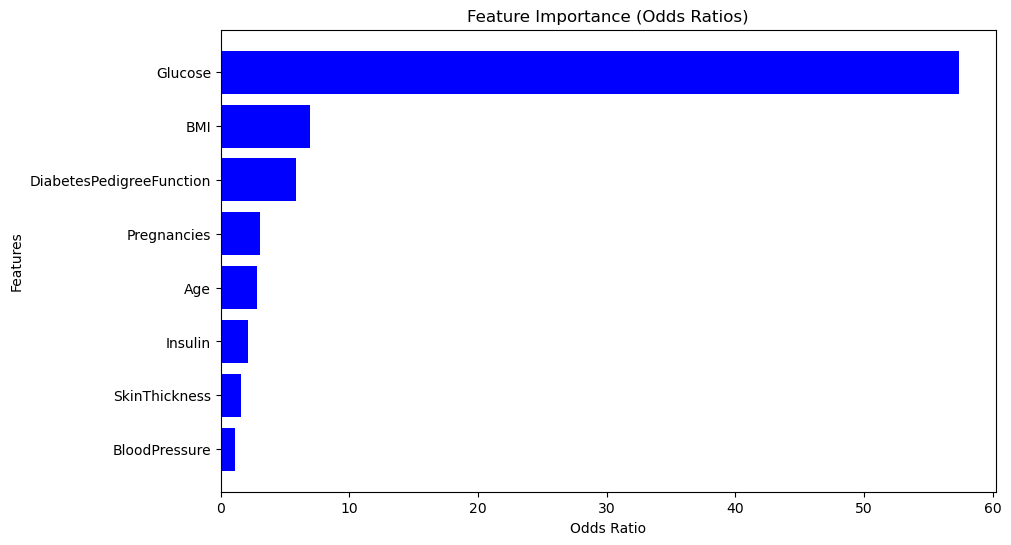

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import cross_val_score

# Stratification: Datensatz in Training (75%) und Test (25%) aufteilen
X = df.drop(columns=['Outcome'])  # Features (alle außer Zielvariable)
y = df['Outcome']  # Zielvariable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Min-Max-Normalisierung
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection (Wähle die besten Merkmale)
selector = SelectKBest(score_func=f_classif, k='all')  # Behalte alle Features, keine Einschränkung
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# RandomForest zur besseren Feature-Analyse
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_
selected_features = np.argsort(feature_importance)[-10:]  # Wähle die 10 wichtigsten Features aus
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

# Logistische Regression mit optimierten Hyperparametern
model = LogisticRegression(max_iter=5000, solver='saga', C=1.0, penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Vorhersagen treffen
y_pred = model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Trainingsdaten:", X_train.shape, "Testdaten:", X_test.shape)
print("Genauigkeit des Modells:", accuracy)
print("Klassifikationsbericht:\n", report)

# Berechnung der Odds Ratios
odds_ratios = np.exp(model.coef_)[0]  # Exponentiierung der Koeffizienten
feature_importance_df = pd.DataFrame({
    'Feature': [X.columns[i] for i in selected_features],
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

print("Feature Importance (Odds Ratios):\n", feature_importance_df)

# Entscheidungsbaum-Modell initialisieren
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Cross-Validation (5-fold) mit normalisierten Daten
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring="accuracy")

# Durchschnittliche Genauigkeit aus Cross-Validation
cv_mean_accuracy = cv_scores.mean()

# Modell auf normalisierten Trainingsdaten trainieren
dt_model.fit(X_train, y_train)

# Vorhersagen auf normalisierten Testdaten
y_pred_dt = dt_model.predict(X_test)

# Genauigkeit auf Testdaten
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Cross-Validation Accuracy (Decision Tree):", cv_mean_accuracy)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)

# Entscheidungsregeln explizit machen
decision_rules = export_text(dt_model, feature_names=[X.columns[i] for i in selected_features])
print("Decision Rules:\n", decision_rules)

# Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Odds Ratio'], color='blue')
plt.xlabel("Odds Ratio")
plt.ylabel("Features")
plt.title("Feature Importance (Odds Ratios)")
plt.gca().invert_yaxis()
plt.show()